In [1]:
!pip install pandas
!pip install geopandas

In [3]:
import pandas as pd

In [5]:
filename = r'C:\Users\jiang\Desktop\1 Big data\Shared_Micromobility_Vehicle_Trips_Austin.csv'

# df - dataframe, Load the CSV file into a DataFrame
df = pd.read_csv(filename, on_bad_lines='warn', sep=';')

# Preview the data
df.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,Start Time (US/Central),End Time (US/Central)
0,5a23a573-418b-443b-8dc8-d7963fe2b063,5cee599e-832c-4fa5-9050-dcc00e3790f3,scooter,"2,184","4,254.483964627391",11/02/2021 12:45:00 AM,11/02/2021 01:15:00 AM,11/03/2021 03:16:12 AM,11.0,1.0,1.0,9.0,9.0,"2,021",4.845300e+10,4.845300e+10,11/01/2021 07:45:00 PM,11/01/2021 08:15:00 PM
1,dac12ecc-0f79-4faa-a626-674a7c9f3df2,20014eea-19b2-4643-b3b3-63c31e76e57b,scooter,705,"2,670.868099468422",11/02/2021 01:30:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:12 AM,11.0,1.0,1.0,3.0,9.0,"2,021",4.845300e+10,4.845300e+10,11/01/2021 08:30:00 PM,11/01/2021 08:30:00 PM
2,d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e,2cad7083-7af6-4b22-8540-9b9dfffc2f58,scooter,189,258.93874414083393,11/02/2021 01:15:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:10 AM,11.0,1.0,1.0,1.0,1.0,"2,021",4.845300e+10,4.845300e+10,11/01/2021 08:15:00 PM,11/01/2021 08:30:00 PM
3,3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb,fde91af9-deb8-41cc-9ddc-472ff7653d90,scooter,203,354.08819384429376,11/02/2021 01:30:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:11 AM,11.0,1.0,1.0,1.0,9.0,"2,021",4.845300e+10,4.845300e+10,11/01/2021 08:30:00 PM,11/01/2021 08:30:00 PM
4,258bea73-5b14-4970-950e-1a1a7c3d715f,b748cae7-7f46-48a7-834d-980565210bf6,scooter,166,757,01/30/2022 05:45:00 PM,01/30/2022 05:45:00 PM,02/08/2022 03:12:27 AM,1.0,17.0,6.0,9.0,9.0,"2,022",4.845300e+10,4.845300e+10,01/30/2022 11:45:00 AM,01/30/2022 11:45:00 AM


In [7]:
# The number of records before data cleaning, de.shape return the tuple of rows,columns
print(df.shape)

(514767, 18)


In [9]:
# Data cleaning

In [11]:
# checking for missing count
missing_counts = df.isnull().sum()
print(missing_counts)

ID                             0
Device ID                      4
Vehicle Type                   5
Trip Duration                  5
Trip Distance                  5
Start Time                     5
End Time                       5
Modified Date                  5
Month                          5
Hour                           5
Day of Week                    5
Council District (Start)    1104
Council District (End)      1166
Year                           5
Census Tract Start          1059
Census Tract End            1056
Start Time (US/Central)      665
End Time (US/Central)        665
dtype: int64


In [13]:
# Remove duplicates
df = df.drop_duplicates()

# checking for empty rows
df=df.dropna(how='all')

# checking for rows missing data
df = df.dropna()
print(df.shape)

(513388, 18)


In [15]:
# revise month data as int and year data as int, reomve ','
df['Day of Week'] = df['Day of Week'].astype('int')
df['Month'] = df['Month'].astype('int')
df['Year'] = df['Year'].str.replace(',','').astype('int')
df["Council District (Start)"] = df["Council District (Start)"].astype('int')
df["Council District (End)"] = df["Council District (End)"].astype('int')
# group year_month
df['Year_Month'] = df['Year'].astype('str') + '-' + df['Month'].astype('str')
df.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,Start Time (US/Central),End Time (US/Central),Year_Month
0,5a23a573-418b-443b-8dc8-d7963fe2b063,5cee599e-832c-4fa5-9050-dcc00e3790f3,scooter,"2,184","4,254.483964627391",11/02/2021 12:45:00 AM,11/02/2021 01:15:00 AM,11/03/2021 03:16:12 AM,11,1.0,1,9,9,2021,4.845300e+10,4.845300e+10,11/01/2021 07:45:00 PM,11/01/2021 08:15:00 PM,2021-11
1,dac12ecc-0f79-4faa-a626-674a7c9f3df2,20014eea-19b2-4643-b3b3-63c31e76e57b,scooter,705,"2,670.868099468422",11/02/2021 01:30:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:12 AM,11,1.0,1,3,9,2021,4.845300e+10,4.845300e+10,11/01/2021 08:30:00 PM,11/01/2021 08:30:00 PM,2021-11
2,d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e,2cad7083-7af6-4b22-8540-9b9dfffc2f58,scooter,189,258.93874414083393,11/02/2021 01:15:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:10 AM,11,1.0,1,1,1,2021,4.845300e+10,4.845300e+10,11/01/2021 08:15:00 PM,11/01/2021 08:30:00 PM,2021-11
3,3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb,fde91af9-deb8-41cc-9ddc-472ff7653d90,scooter,203,354.08819384429376,11/02/2021 01:30:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:11 AM,11,1.0,1,1,9,2021,4.845300e+10,4.845300e+10,11/01/2021 08:30:00 PM,11/01/2021 08:30:00 PM,2021-11
4,258bea73-5b14-4970-950e-1a1a7c3d715f,b748cae7-7f46-48a7-834d-980565210bf6,scooter,166,757,01/30/2022 05:45:00 PM,01/30/2022 05:45:00 PM,02/08/2022 03:12:27 AM,1,17.0,6,9,9,2022,4.845300e+10,4.845300e+10,01/30/2022 11:45:00 AM,01/30/2022 11:45:00 AM,2022-1


In [17]:
# df.describe

In [19]:
# start date and time
df_sorted = df.sort_values(by=['Year','Month','Start Time'], ascending=[True,True,True])
df_sorted['Month'] = df_sorted['Month'].astype(int)
df_sorted.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,Start Time (US/Central),End Time (US/Central),Year_Month
513978,00a04d69-d71a-4d1c-9ece-8c13a3669892,9269391d-72b1-46cc-8ebf-f41741538722,scooter,234,"1,203",08/19/2021 01:00:00 PM,08/19/2021 01:15:00 PM,08/20/2021 03:16:29 PM,8,13.0,3,9,9,2021,4.845300e+10,4.845300e+10,08/19/2021 08:00:00 AM,08/19/2021 08:15:00 AM,2021-8
513979,ef2309b6-d84e-4c12-be0d-d1009f789ae1,b62f874f-91ca-475c-9ba7-b85a43a319b9,scooter,169,876,08/19/2021 01:00:00 PM,08/19/2021 01:15:00 PM,08/20/2021 03:16:30 PM,8,13.0,3,3,3,2021,4.845300e+10,4.845300e+10,08/19/2021 08:00:00 AM,08/19/2021 08:15:00 AM,2021-8
513980,fd915d29-4d6d-463c-a7a8-9277f8e8b662,693a9982-dfb8-4d8a-b69a-a56192ad4411,scooter,339,"1,489",08/19/2021 01:00:00 PM,08/19/2021 01:15:00 PM,08/20/2021 03:16:30 PM,8,13.0,3,9,9,2021,4.845300e+10,4.845300e+10,08/19/2021 08:00:00 AM,08/19/2021 08:15:00 AM,2021-8
513981,3fa7fd23-c966-4fad-b8ab-89e41ccf557e,c45d328a-4aab-4256-a702-c62becde4680,scooter,281,"1,086",08/19/2021 01:00:00 PM,08/19/2021 01:00:00 PM,08/20/2021 03:16:30 PM,8,13.0,3,9,9,2021,4.845300e+10,4.845300e+10,08/19/2021 08:00:00 AM,08/19/2021 08:00:00 AM,2021-8
513982,403d7e60-0fe3-45fd-a21e-3dc9db6c6809,d67654db-436f-4fda-975f-295d555412b6,scooter,310,"1,536",08/19/2021 01:00:00 PM,08/19/2021 01:00:00 PM,08/20/2021 03:16:30 PM,8,13.0,3,5,9,2021,4.845300e+10,4.845300e+10,08/19/2021 08:00:00 AM,08/19/2021 08:00:00 AM,2021-8


In [21]:
# recent date and time
df_sorted = df.sort_values(by=['Year','Month','Start Time'], ascending=[False,False,False])
df_sorted['Month'] = df_sorted['Month'].astype(int)
df_sorted.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,Start Time (US/Central),End Time (US/Central),Year_Month
77267,686f16b9-d12d-4671-92ee-e1bce804736b,23dd6e85-f138-441f-bd34-365bbca9226d,scooter,37,0,03/25/2022 12:30:00 AM,03/25/2022 12:30:00 AM,03/26/2022 01:16:28 AM,3,0.0,4,3,3,2022,4.845300e+10,4.845300e+10,03/24/2022 07:30:00 PM,03/24/2022 07:30:00 PM,2022-3
8705,ce726d9d-9995-4c28-b0e1-a9d56216357c,11c14c27-b471-4931-8c42-bddeacfbcec9,scooter,194,385,03/25/2022 12:00:00 AM,03/25/2022 12:00:00 AM,03/26/2022 12:16:39 AM,3,0.0,4,9,9,2022,4.845300e+10,4.845300e+10,03/24/2022 07:00:00 PM,03/24/2022 07:00:00 PM,2022-3
8707,13d9c06f-ab81-4612-b226-607e4abc127e,9b3bdf06-c2e1-45a9-9a06-b8e7d75815a3,scooter,192,"1,021",03/25/2022 12:00:00 AM,03/25/2022 12:00:00 AM,03/26/2022 12:16:43 AM,3,0.0,4,9,9,2022,4.845300e+10,4.845300e+10,03/24/2022 07:00:00 PM,03/24/2022 07:00:00 PM,2022-3
9274,a3d1e669-24c2-4b14-81d5-734912b5d283,f938386d-44af-4c5c-9670-2acf6baf24d1,scooter,451,"1,703",03/25/2022 12:00:00 AM,03/25/2022 12:15:00 AM,03/26/2022 01:30:14 AM,3,0.0,4,9,9,2022,4.845300e+10,4.845300e+10,03/24/2022 07:00:00 PM,03/24/2022 07:15:00 PM,2022-3
2630,147836f0-e0df-4b3a-a539-550e4bdc029f,e4a95597-b723-4b88-a0bb-a46d186395e9,scooter,509,"2,567",03/24/2022 12:45:00 PM,03/24/2022 01:00:00 PM,03/25/2022 01:15:22 PM,3,13.0,3,9,9,2022,4.845300e+10,4.845300e+10,03/24/2022 07:45:00 AM,03/24/2022 08:00:00 AM,2022-3


In [23]:
# Number of records per year and month in micro-mobility dataset
record_year_month = df.groupby(['Year','Month','Year_Month'],as_index = False).size()
record_year_month = record_year_month.rename(columns={'size': 'Records'})
record_year_month

,Year,Month,Year_Month,Records
0,2021,8,2021-8,163781
1,2021,9,2021-9,236340
2,2021,10,2021-10,43086
3,2021,11,2021-11,27338
4,2021,12,2021-12,26803
5,2022,1,2022-1,6568
6,2022,2,2022-2,7783
7,2022,3,2022-3,1689


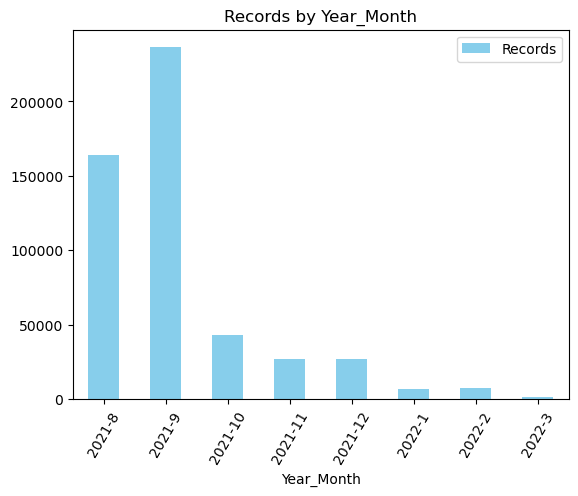

In [25]:
# Plot the monthly number of records as a bar plot
bp_num_rec = record_year_month.plot(x='Year_Month',y='Records',kind='bar',color='skyblue',title='Records by Year_Month', rot=60)

In [26]:
#  Number of unique vehicles by year and vehicle type 
Vehicle_year = df.groupby(['Year','Vehicle Type'])['Device ID'].nunique().reset_index()
Vehicle_year = Vehicle_year.rename(columns={'Device ID': 'Number of Unique Devices'})
Vehicle_year

,Year,Vehicle Type,Number of Unique Devices
0,2021,bicycle,650
1,2021,moped,36
2,2021,scooter,24815
3,2022,bicycle,177
4,2022,moped,11
5,2022,scooter,7341


In [28]:
# Number of records per day in micro-mobility dataset
record_day = df.groupby(['Day of Week'],as_index = False).size()
record_day = record_day.rename(columns={'size': 'Number of Usage'})
record_day

,Day of Week,Number of Usage
0,0,76568
1,1,52767
2,2,48931
3,3,62934
4,4,68316
5,5,102813
6,6,101059


[Text(0, 0, 'Sun'),
 Text(1, 0, 'Mon'),
 Text(2, 0, 'Tue'),
 Text(3, 0, 'Wed'),
 Text(4, 0, 'Thu'),
 Text(5, 0, 'Fri'),
 Text(6, 0, 'Sat')]

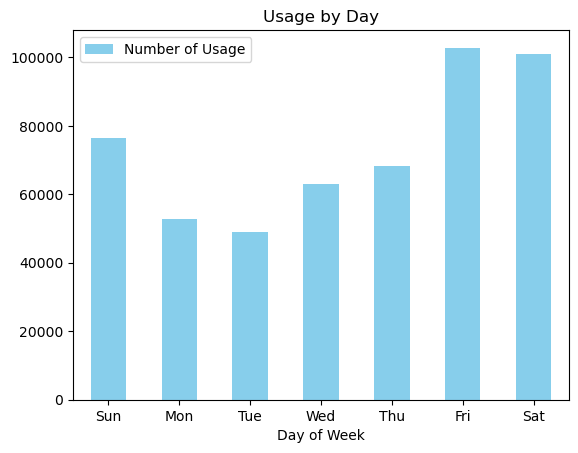

In [32]:
bp_day = record_day.plot(x='Day of Week',kind='bar',color='skyblue',title='Usage by Day',rot=0)
# revise day labels as 0 represent Sunday and 1-6 represent Monday to Saturday
day_labels = ['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
# Set the custom ticks and labels
bp_day.set_xticks(range(len(day_labels)))
bp_day.set_xticklabels(day_labels)

In [34]:
# Number of records per month in micro-mobility dataset
record_month = df.groupby(['Month'],as_index = False).size()
record_month = record_month.rename(columns={'size': 'Number of Usage'})
record_month

,Month,Number of Usage
0,1,6568
1,2,7783
2,3,1689
3,8,163781
4,9,236340
5,10,43086
6,11,27338
7,12,26803


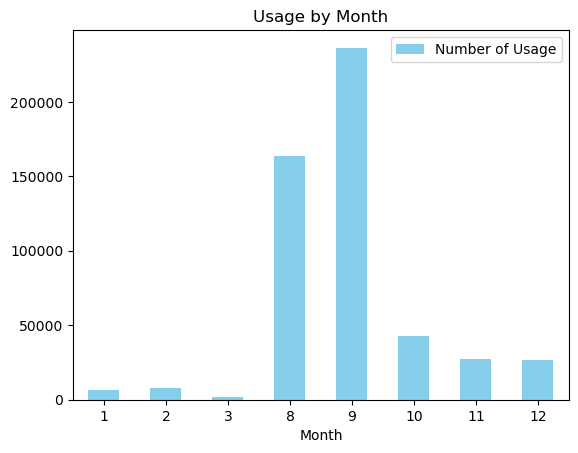

In [36]:
bp_month = record_month.plot(x='Month',kind='bar',color='skyblue',title='Usage by Month', rot=0)


In [38]:
df_2021 = df[df['Year'] == 2021]

Vehicle_2021 = df_2021.groupby(['Year','Vehicle Type'],as_index = False)['Trip Distance'].size()

Vehicle_2021

,Year,Vehicle Type,size
0,2021,bicycle,7496
1,2021,moped,58
2,2021,scooter,489794


In [46]:
import pandas as pd

df_2021['Start Time'] = pd.to_datetime(df_2021['Start Time'], format='%m/%d/%Y %I:%M:%S %p')
df_2021['End Time'] = pd.to_datetime(df_2021['End Time'], format='%m/%d/%Y %I:%M:%S %p')
# calculate the time
df_2021['Calculated Duration'] = df_2021['End Time'] - df_2021['Start Time']
# calculate total mins
df_2021['Calculated Duration (Seconds)'] = df_2021['Calculated Duration'].dt.total_seconds()
df_2021['Calculated Duration (Minutes)'] = df_2021['Calculated Duration (Seconds)'] / 60
# df_2021['Calculated Duration (Minutes)']

# group by different device to check each total usage time
Vehicle_sum = df_2021.groupby('Vehicle Type')['Calculated Duration (Minutes)'].sum()
Vehicle_sum

C:\Users\jiang\AppData\Local\Temp\ipykernel_13452\2613119913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Start Time'] = pd.to_datetime(df_2021['Start Time'], format='%m/%d/%Y %I:%M:%S %p')
C:\Users\jiang\AppData\Local\Temp\ipykernel_13452\2613119913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['End Time'] = pd.to_datetime(df_2021['End Time'], format='%m/%d/%Y %I:%M:%S %p')
C:\Users\jiang\AppData\Local\Temp\ipykernel_13452\2613119913.py:6: SettingWithCopyWarning: 
A value is t

Vehicle Type
bicycle      98460.0
moped         1620.0
scooter    5531325.0
Name: Calculated Duration (Minutes), dtype: float64

In [20]:
df_2022 = df[df['Year'] == 2022]

Vehicle_2022 = df_2022.groupby(['Year','Vehicle Type'],as_index = False)['Trip Distance'].size()

Vehicle_2022

,Year,Vehicle Type,size
0,2022,bicycle,381
1,2022,moped,14
2,2022,scooter,15645


In [21]:
df_Trip_num = df.groupby(['Vehicle Type'],as_index = False)['Trip Distance'].size()

df_Trip_num

,Vehicle Type,size
0,bicycle,7877
1,moped,72
2,scooter,505439


In [22]:
import matplotlib.pyplot as plt

In [23]:
# Calculate the number of trips for each vehicle in the database

vehicle_trip_counts = df.groupby('Device ID').size().reset_index(name='Trip Count')
vehicle_trip_counts.head(20)

,Device ID,Trip Count
0,0004ddfb-f69b-4e07-93a0-8581521da1c9,11
1,0006d72d-880a-40c4-91f1-98e2456e3956,5
2,000e12c8-680e-4548-b913-ed0923184b3f,2
3,000ed98a-6b35-427a-b523-8e6d1c8efeb2,16
4,0010f989-4ff7-4cf0-a659-2b9e0a8e41ec,58
5,0012fce4-c44f-4ed9-b588-df502ac8923e,22
6,0015b896-524f-4d5a-ac09-52599740291d,6
7,001f564d-e4b9-40ce-8719-deaee5e5dfee,2
8,0022d4a3-aa73-4f75-b85f-d773aaed9d0f,5
9,00241a2a-a934-4978-a18c-77ecd0c80e95,4


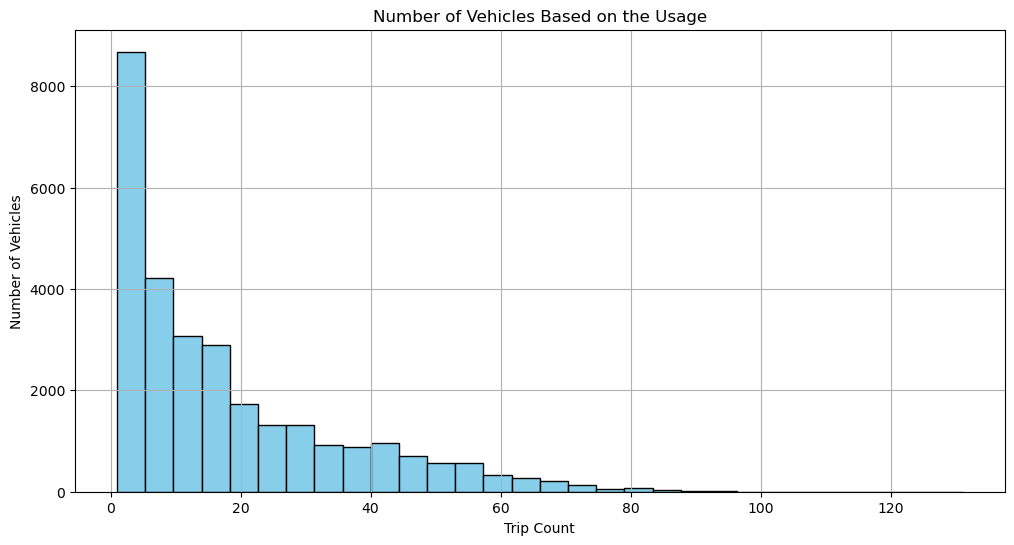

In [24]:
# produce a histogram for it 
vehicle_trip_counts['Trip Count'].hist(
    bins=30,         
    color='SKYBLUE', 
    edgecolor='black', 
    figsize=(12, 6),
    )

plt.title('Number of Vehicles Based on the Usage')  # Add the title
plt.xlabel('Trip Count')                           # Add label for x-axis
plt.ylabel('Number of Vehicles')                  # Add label for y-axis
plt.show()

# Most vehicles are used not frequently and only least propotion used in high frequence may because of used in high demand area

In [25]:
# OD matrix 

In [26]:
#OD Matrix calculation using pivot table

#The code builds an OD matrix by counting trips between council district pairs using pivot_table.
#The index and columns specify start and end districts, while values='count' and aggfunc='count' tally trips.
#Adding count=1 enables each trip to be counted. Other aggfunc options include "sum","mean","min", and cuntom functions.


matrix = (
    df.assign(count=1)
    .pivot_table(index="Council District (Start)", columns="Council District (End)",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype('int')
).sort_values("Council District (Start)")

matrix

Council District (End),1,2,3,4,5,6,7,8,9,10
Council District (Start),,,,,,,,,,
1,12388,1,3304,61,177,1,7,47,14021,26
2,1,514,145,0,26,0,0,3,18,0
3,3991,231,40902,15,750,0,2,85,20733,25
4,57,0,5,506,2,0,86,1,207,14
5,139,39,843,1,9822,0,1,744,7417,47
7,6,0,2,80,0,0,383,0,159,50
8,27,1,49,2,714,0,1,1243,957,29
9,14505,132,23888,384,7961,5,245,1354,341083,1072
10,18,0,16,31,21,1,72,21,627,844


In [27]:
import seaborn as sn

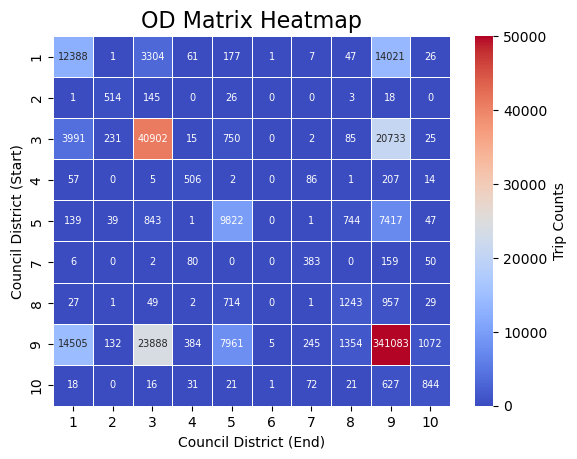

In [28]:
# as the second largest number is 40902, so figure limited to 50000, to make it shown clearly
# Greens coolwarm
sn.heatmap(matrix, 
           cmap="coolwarm", 
           annot=True, 
           fmt=".0f", 
           linewidths=.5,
           annot_kws={"size": 7}, 
           cbar_kws={'label': 'Trip Counts'},
           vmin=0,
           vmax=50000
          )
plt.title("OD Matrix Heatmap", fontsize=16)
plt.xlabel("Council District (End)")
plt.ylabel("Council District (Start)")
plt.show()

In [29]:
# Chicago dataset
filename = r'C:\Users\jiang\Desktop\1 Big data\Divvy_Trips.csv'

# df - dataframe, Load the CSV file into a DataFrame
df_chicago = pd.read_csv(filename, on_bad_lines='warn', sep=';',low_memory=False)
df_chicago['TRIP ID'] = pd.to_numeric(df_chicago['TRIP ID'], errors='coerce').fillna(0).astype(int)
# Preview the data
df_chicago.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,8546790,12/31/2015 05:35:00 PM,12/31/2015 05:44:00 PM,979.0,521,117.0,Wilton Ave & Belmont Ave,229.0,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739)
1,8546793,12/31/2015 05:37:00 PM,12/31/2015 05:41:00 PM,1932.0,256,301.0,Clark St & Schiller St,138.0,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613)
2,8546795,12/31/2015 05:37:00 PM,12/31/2015 05:40:00 PM,1693.0,134,465.0,Marine Dr & Ainslie St,251.0,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968)
3,8546797,12/31/2015 05:38:00 PM,12/31/2015 05:55:00 PM,3370.0,995,333.0,Ashland Ave & Blackhawk St,198.0,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892)
4,8546798,12/31/2015 05:38:00 PM,12/31/2015 05:41:00 PM,2563.0,177,48.0,Larrabee St & Kingsbury St,111.0,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666)


In [30]:
filename = r'C:\Users\jiang\Desktop\1 Big data\Wards_Chicago.csv'

# df - dataframe, Load the CSV file into a DataFrame
wards_chicago = pd.read_csv(filename, on_bad_lines='warn', sep=',')

# Preview the data
wards_chicago.head()

,Ward,the_geom,objectid,edit_date,ward_id,globalid,st_area_sh,st_length_
0,1,MULTIPOLYGON (((-87.68777205374418 41.92858465...,51,06/01/2022,1,{DB2A2A7D-FAF1-42A4-B061-AE18C31A80BB},"65,893,461.4401","61,878.8215865"
1,2,MULTIPOLYGON (((-87.62517201063106 41.90399836...,52,06/01/2022,2,{88F300F6-D6DF-4337-8DE3-0C2D27A5B338},"31,285,111.9943","74,175.9492394"
2,5,MULTIPOLYGON (((-87.56030308695986 41.76635735...,55,06/01/2022,5,{0A109A41-9DED-47D7-934E-1EA1CC7EE025},"112,080,253.112","88,207.6902413"
3,6,MULTIPOLYGON (((-87.61794321281114 41.77292489...,56,06/01/2022,6,{FD74A999-4BBA-4CE3-BEBB-CC76423037E8},"139,202,213.922","80,779.8518905"
4,7,MULTIPOLYGON (((-87.54393108740227 41.76029599...,57,06/01/2022,7,{279FCBD9-EA0D-4FFC-A8CA-EDA2676C0721},"141,492,407.923","98,906.567862"


In [31]:
import geopandas as gpd
from shapely import wkt

In [32]:
#convert 'the geom' in wards_chicago from WKT(WELL KNOW TEXT) TO SHAPELY OBJECTS
#'The geom' columns contains MULTIPOLYGON data in text format
wards_chicago['the_geom'] = wards_chicago['the_geom'].apply(wkt.loads)
wards_gdf = gpd.GeoDataFrame(wards_chicago, geometry='the_geom')

In [33]:
# check the error
df_chicago[['FROM LOCATION', 'TO LOCATION']].head()

,FROM LOCATION,TO LOCATION
0,POINT (-87.65304 41.94018),POINT (-87.66402 41.943739)
1,POINT (-87.631501 41.907993),POINT (-87.640552 41.904613)
2,POINT (-87.650154 41.9716),POINT (-87.650001 41.967968)
3,POINT (-87.667252 41.907066),POINT (-87.648789 41.881892)
4,POINT (-87.642884 41.897764),POINT (-87.638437 41.894666)


In [34]:
# clean Nan value
df_chicago = df_chicago.dropna(subset=['FROM LOCATION', 'TO LOCATION'])

In [35]:
#Convert 'FROM LOCATION' and 'TO LOCATION' in df_chicago from WKT to shapely point object
df_chicago['from_point'] = df_chicago['FROM LOCATION'].apply(wkt.loads)
df_chicago['to_point'] = df_chicago['TO LOCATION'].apply(wkt.loads)

In [36]:
#These columns contain POINT data in text format
df_from_gdf = gpd.GeoDataFrame(df_chicago, geometry='from_point')
df_to_gdf = gpd.GeoDataFrame(df_chicago, geometry='to_point')

In [37]:
# ensure the CRS both GeoDataFrames are the same
# CRS depend on the data, for example, it can be set to 'EPSG:4326' for WGS84

df_from_gdf.set_crs('EPSG:4326', inplace=True, allow_override=True)
df_to_gdf.set_crs('EPSG:4326', inplace=True, allow_override=True)
wards_gdf.set_crs('EPSG:4326', inplace=True, allow_override=True)

,Ward,the_geom,objectid,edit_date,ward_id,globalid,st_area_sh,st_length_
0,1,"MULTIPOLYGON (((-87.68777 41.92858, -87.68776 ...",51,06/01/2022,1,{DB2A2A7D-FAF1-42A4-B061-AE18C31A80BB},"65,893,461.4401","61,878.8215865"
1,2,"MULTIPOLYGON (((-87.62517 41.904, -87.625 41.9...",52,06/01/2022,2,{88F300F6-D6DF-4337-8DE3-0C2D27A5B338},"31,285,111.9943","74,175.9492394"
2,5,"MULTIPOLYGON (((-87.5603 41.76636, -87.56058 4...",55,06/01/2022,5,{0A109A41-9DED-47D7-934E-1EA1CC7EE025},"112,080,253.112","88,207.6902413"
3,6,"MULTIPOLYGON (((-87.61794 41.77292, -87.61786 ...",56,06/01/2022,6,{FD74A999-4BBA-4CE3-BEBB-CC76423037E8},"139,202,213.922","80,779.8518905"
4,7,"MULTIPOLYGON (((-87.54393 41.7603, -87.5437 41...",57,06/01/2022,7,{279FCBD9-EA0D-4FFC-A8CA-EDA2676C0721},"141,492,407.923","98,906.567862"
5,10,"MULTIPOLYGON (((-87.53018 41.7431, -87.53008 4...",60,06/01/2022,10,{19FF2026-6DDD-45DA-8DF6-B44B0C15834C},"577,339,461.932","147,455.404991"
6,11,"MULTIPOLYGON (((-87.636 41.81635, -87.63602 41...",61,06/01/2022,11,{C7397C87-C4AE-4C48-A00E-50D2CD1100CF},"127,348,411.748","64,972.8697261"
7,3,"MULTIPOLYGON (((-87.61992 41.86577, -87.61985 ...",53,06/01/2022,3,{4F169974-0F93-4C35-98C1-20A8415C72F5},"97,773,414.0062","85,625.5976201"
8,4,"MULTIPOLYGON (((-87.62429 41.877, -87.62429 41...",54,06/01/2022,4,{02DC7BBB-BD1E-413C-994E-0A3154FD3D54},"115,809,136.712","103,594.867171"
9,8,"MULTIPOLYGON (((-87.58587 41.76424, -87.58597 ...",58,06/01/2022,8,{2B5945BD-349C-4088-9B25-D99D4FB6C01D},"179,992,648.531","77,255.5682236"


In [38]:
# Perform spatial joins
# Join df_from_gdf and df_to_gdf with wards_gdf to find the corresponding wards
from_joined = gpd.sjoin(df_from_gdf, wards_gdf, how='left')
to_joined = gpd.sjoin(df_to_gdf, wards_gdf, how='left')

In [39]:
#add the ward information back to the original df_chicago data frame
df_chicago['FROM WARD'] = from_joined['Ward'] #replace 'Ward' with the actual column name
df_chicago['TO WARD'] = to_joined['Ward'] #replace 'Ward' with the actual column name

In [40]:
#display the first few rows of the updated df_chicago to check the results
df_chicago.head()

#df_chicago now contains two new columns 'FROM WARD' and "TO WARD"

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,...,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD
0,8546790,12/31/2015 05:35:00 PM,12/31/2015 05:44:00 PM,979.0,521,117.0,Wilton Ave & Belmont Ave,229.0,Southport Ave & Roscoe St,Subscriber,...,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),POINT (-87.65304 41.94018),POINT (-87.66402 41.943739),44,44
1,8546793,12/31/2015 05:37:00 PM,12/31/2015 05:41:00 PM,1932.0,256,301.0,Clark St & Schiller St,138.0,Clybourn Ave & Division St,Subscriber,...,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),POINT (-87.631501 41.907993),POINT (-87.640552 41.904613),2,27
2,8546795,12/31/2015 05:37:00 PM,12/31/2015 05:40:00 PM,1693.0,134,465.0,Marine Dr & Ainslie St,251.0,Clarendon Ave & Leland Ave,Subscriber,...,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),POINT (-87.650154 41.9716),POINT (-87.650001 41.967968),48,46
3,8546797,12/31/2015 05:38:00 PM,12/31/2015 05:55:00 PM,3370.0,995,333.0,Ashland Ave & Blackhawk St,198.0,Green St (Halsted St) & Madison St,Subscriber,...,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),POINT (-87.667252 41.907066),POINT (-87.648789 41.881892),1,27
4,8546798,12/31/2015 05:38:00 PM,12/31/2015 05:41:00 PM,2563.0,177,48.0,Larrabee St & Kingsbury St,111.0,Sedgwick St & Huron St,Subscriber,...,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),POINT (-87.642884 41.897764),POINT (-87.638437 41.894666),27,42


In [41]:
#Chicago OD Matrix calculation using pivot table

#The code builds an OD matrix by counting trips between WARD pairs using pivot_table.
#The index and columns specify FROM WARD and TO WARD, while values='count' and aggfunc='count' tally trips.
#Adding count=1 enables each trip to be counted. Other aggfunc options include "sum","mean","min", and cuntom functions.


chicago_matrix = (
    df_chicago.assign(count=1)
    .pivot_table(index="FROM WARD", columns="TO WARD",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype('int')
).sort_values("FROM WARD")

chicago_matrix

TO WARD,1,2,3,4,5,11,20,25,26,27,...,32,34,35,36,42,43,44,46,47,48
FROM WARD,,,,,,,,,,,,,,,,,,,,,
1,23186,3902,52,384,11,47,1,318,2677,7225,...,7890,4537,2748,3380,8925,4949,1247,207,862,14
2,4040,26823,658,3934,67,176,5,160,143,8862,...,3347,10958,115,404,42622,28345,6857,2601,722,148
3,67,669,5481,6402,550,1420,19,767,0,299,...,26,5281,2,3,6473,249,29,27,4,3
4,485,4218,6123,29843,2934,1295,112,672,16,1321,...,195,12251,4,49,31758,1801,235,140,31,14
5,6,59,407,2967,4061,8,21,11,0,7,...,5,57,0,0,511,23,2,4,0,1
11,46,162,1295,1294,18,4118,3,978,1,261,...,8,1348,1,8,868,88,24,1,5,1
20,6,1,27,101,53,2,35,7,0,7,...,2,12,0,0,14,3,0,0,0,0
25,472,147,815,712,8,1037,7,5268,52,1258,...,73,3143,12,169,1916,109,43,10,4,0
26,2337,181,0,14,0,2,0,28,818,666,...,589,241,332,269,286,180,42,6,47,1


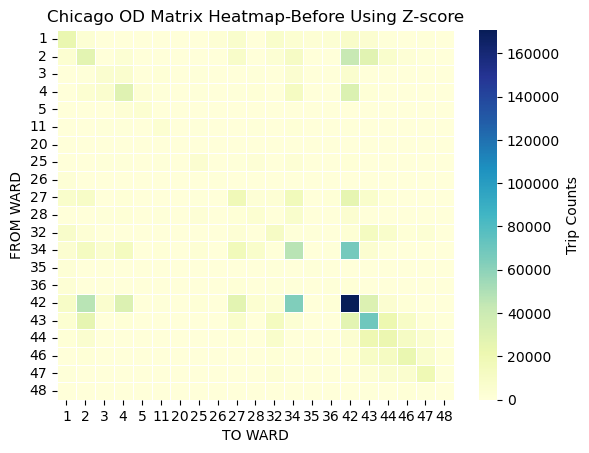

In [42]:
# as the second largest number is 40902, so figure limited to 50000, to make it shown clearly
# Greens coolwarm
sn.heatmap(chicago_matrix, 
           cmap="YlGnBu", 
           annot=False, 
           fmt=".0f", 
           linewidths=.5,
           annot_kws={"size": 5}, 
           cbar_kws={'label': 'Trip Counts'},
          
          )
plt.title("Chicago OD Matrix Heatmap-Before Using Z-score")
plt.xlabel("TO WARD")
plt.ylabel("FROM WARD")
plt.show()

In [43]:
# outlier
#Group by two different columns
chicago_type_groups = df_chicago.groupby(["FROM WARD",
                                     "TO WARD"]).size()
#reset index to change columns used for groupby from 'index' to 'column'
chicago_type_groups_df = chicago_type_groups.reset_index()

#Change column name for the count column
chicago_type_groups_df = chicago_type_groups_df.rename(columns={0:"Count"},
                                                             errors="raise")

chicago_type_groups_df

,FROM WARD,TO WARD,Count
0,1,1,23186
1,1,2,3902
2,1,3,52
3,1,4,384
4,1,5,11
...,...,...,...
408,48,43,786
409,48,44,581
410,48,46,1498
411,48,47,978


In [44]:
import numpy as np
from scipy import stats

In [45]:
#Removing outliers using z-score
#The z-score is a measure of how many (3) standard devistion on element is from the mean of dataset.
chicago_type_groups_df_no_outliers = chicago_type_groups_df[(np.abs(stats.zscore(chicago_type_groups_df['Count'])) < 3)]
chicago_type_groups_df_no_outliers

,FROM WARD,TO WARD,Count
0,1,1,23186
1,1,2,3902
2,1,3,52
3,1,4,384
4,1,5,11
...,...,...,...
408,48,43,786
409,48,44,581
410,48,46,1498
411,48,47,978


In [46]:
#Chicago OD Matrix calculation using pivot table

pivot_table = chicago_type_groups_df_no_outliers.pivot(
    index="FROM WARD", 
    columns="TO WARD", 
    values="Count"
)
pivot_table

TO WARD,1,2,3,4,5,11,20,25,26,27,...,32,34,35,36,42,43,44,46,47,48
FROM WARD,,,,,,,,,,,,,,,,,,,,,
1,23186.0,3902.0,52.0,384.0,11.0,47.0,1.0,318.0,2677.0,7225.0,...,7890.0,4537.0,2748.0,3380.0,8925.0,4949.0,1247.0,207.0,862.0,14.0
2,4040.0,26823.0,658.0,3934.0,67.0,176.0,5.0,160.0,143.0,8862.0,...,3347.0,10958.0,115.0,404.0,NaN,28345.0,6857.0,2601.0,722.0,148.0
3,67.0,669.0,5481.0,6402.0,550.0,1420.0,19.0,767.0,NaN,299.0,...,26.0,5281.0,2.0,3.0,6473.0,249.0,29.0,27.0,4.0,3.0
4,485.0,4218.0,6123.0,29843.0,2934.0,1295.0,112.0,672.0,16.0,1321.0,...,195.0,12251.0,4.0,49.0,31758.0,1801.0,235.0,140.0,31.0,14.0
5,6.0,59.0,407.0,2967.0,4061.0,8.0,21.0,11.0,NaN,7.0,...,5.0,57.0,NaN,NaN,511.0,23.0,2.0,4.0,NaN,1.0
11,46.0,162.0,1295.0,1294.0,18.0,4118.0,3.0,978.0,1.0,261.0,...,8.0,1348.0,1.0,8.0,868.0,88.0,24.0,1.0,5.0,1.0
20,6.0,1.0,27.0,101.0,53.0,2.0,35.0,7.0,NaN,7.0,...,2.0,12.0,NaN,NaN,14.0,3.0,NaN,NaN,NaN,NaN
25,472.0,147.0,815.0,712.0,8.0,1037.0,7.0,5268.0,52.0,1258.0,...,73.0,3143.0,12.0,169.0,1916.0,109.0,43.0,10.0,4.0,NaN
26,2337.0,181.0,NaN,14.0,NaN,2.0,NaN,28.0,818.0,666.0,...,589.0,241.0,332.0,269.0,286.0,180.0,42.0,6.0,47.0,1.0


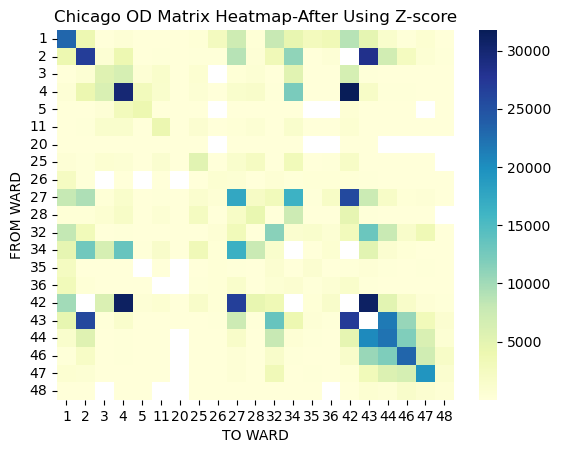

In [47]:
sn.heatmap(pivot_table, cmap="YlGnBu", annot=False)
plt.title("Chicago OD Matrix Heatmap-After Using Z-score")
plt.xlabel("TO WARD")
plt.ylabel("FROM WARD")
plt.show()

In [48]:
# Drop rows where BIRTH YEAR, START TIME and STOP TIME is NaN
df_chicago = df_chicago.dropna(subset=['BIRTH YEAR','START TIME','STOP TIME'])

# Convert START TIME and STOP TIME to datetime
df_chicago['START TIME'] = pd.to_datetime(df_chicago['START TIME'])
df_chicago['STOP TIME'] = pd.to_datetime(df_chicago['STOP TIME'])

pd.set_option('display.max_columns', None)
df_chicago.head(2)

C:\Users\jiang\AppData\Local\Temp\ipykernel_13612\3889894269.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_chicago['START TIME'] = pd.to_datetime(df_chicago['START TIME'])
C:\Users\jiang\AppData\Local\Temp\ipykernel_13612\3889894269.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_chicago['STOP TIME'] = pd.to_datetime(df_chicago['STOP TIME'])


,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117.0,Wilton Ave & Belmont Ave,229.0,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),POINT (-87.65304 41.94018),POINT (-87.66402 41.943739),44,44
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301.0,Clark St & Schiller St,138.0,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),POINT (-87.631501 41.907993),POINT (-87.640552 41.904613),2,27


In [49]:
# Calculate user age and categorize into age groups
current_year = 2025
df_chicago['AGE'] = current_year - df_chicago['BIRTH YEAR']

def age_group(age):
    if age < 18:
        return 'Children'
    elif 18 <= age <= 60:
        return 'Adults'
    else:
        return 'Seniors'
df_chicago['AGE GROUP'] = df_chicago['AGE'].apply(age_group)
df_chicago.head(2)

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD,AGE,AGE GROUP
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117.0,Wilton Ave & Belmont Ave,229.0,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),POINT (-87.65304 41.94018),POINT (-87.66402 41.943739),44,44,34.0,Adults
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301.0,Clark St & Schiller St,138.0,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),POINT (-87.631501 41.907993),POINT (-87.640552 41.904613),2,27,33.0,Adults


In [50]:
# Categorize time into peak and non-peak hours
# Peak hour:7-9 17-19
# Non peak hour: other time
def time_category(start_time):
    hour = start_time.hour
    if 7 <= hour <= 9 or 17 <= hour <= 19:
        return 'Peak'
    else:
        return 'Non-Peak'
df_chicago['TIME CATEGORY'] = df_chicago['START TIME'].apply(time_category)
df_chicago.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD,AGE,AGE GROUP,TIME CATEGORY
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117.0,Wilton Ave & Belmont Ave,229.0,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),POINT (-87.65304 41.94018),POINT (-87.66402 41.943739),44,44,34.0,Adults,Peak
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301.0,Clark St & Schiller St,138.0,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),POINT (-87.631501 41.907993),POINT (-87.640552 41.904613),2,27,33.0,Adults,Peak
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465.0,Marine Dr & Ainslie St,251.0,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),POINT (-87.650154 41.9716),POINT (-87.650001 41.967968),48,46,38.0,Adults,Peak
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333.0,Ashland Ave & Blackhawk St,198.0,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),POINT (-87.667252 41.907066),POINT (-87.648789 41.881892),1,27,50.0,Adults,Peak
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48.0,Larrabee St & Kingsbury St,111.0,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),POINT (-87.642884 41.897764),POINT (-87.638437 41.894666),27,42,35.0,Adults,Peak


In [51]:
chi_child = df_chicago.groupby('AGE GROUP').size()
chi_child

AGE GROUP
Adults     843310
Seniors    125976
dtype: int64

In [52]:
# Age group = Adults
# Time category = Peak
Adults_peak = df_chicago[(df_chicago['AGE GROUP'] == 'Adults') & 
                           (df_chicago['TIME CATEGORY'] == 'Peak')]
Adults_peak.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD,AGE,AGE GROUP,TIME CATEGORY
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117.0,Wilton Ave & Belmont Ave,229.0,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),POINT (-87.65304 41.94018),POINT (-87.66402 41.943739),44,44,34.0,Adults,Peak
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301.0,Clark St & Schiller St,138.0,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),POINT (-87.631501 41.907993),POINT (-87.640552 41.904613),2,27,33.0,Adults,Peak
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465.0,Marine Dr & Ainslie St,251.0,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),POINT (-87.650154 41.9716),POINT (-87.650001 41.967968),48,46,38.0,Adults,Peak
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333.0,Ashland Ave & Blackhawk St,198.0,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),POINT (-87.667252 41.907066),POINT (-87.648789 41.881892),1,27,50.0,Adults,Peak
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48.0,Larrabee St & Kingsbury St,111.0,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),POINT (-87.642884 41.897764),POINT (-87.638437 41.894666),27,42,35.0,Adults,Peak


In [53]:
Adults_peak_matrix = (
    Adults_peak.assign(count=1)
    .pivot_table(index="FROM WARD", columns="TO WARD",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype('int')
).sort_values("FROM WARD")

Adults_peak_matrix

TO WARD,1,2,3,4,5,11,20,25,26,27,28,32,34,35,36,42,43,44,46,47,48
FROM WARD,,,,,,,,,,,,,,,,,,,,,
1,6595,992,9,97,2,3,0,63,887,2228,88,2378,2035,1027,908,4156,943,267,31,222,1
2,949,4019,128,411,1,32,0,21,26,2844,94,820,3392,21,117,9500,5638,1709,654,206,13
3,14,176,1094,1168,124,270,1,175,0,95,248,2,2242,0,1,1988,33,2,6,1,0
4,128,462,1283,2762,480,265,15,127,1,323,290,24,2902,0,14,3941,254,71,11,5,0
5,2,0,71,435,963,1,2,1,0,0,0,0,7,0,0,13,2,1,0,0,0
11,4,31,224,170,0,1171,0,215,0,42,253,0,483,0,1,185,6,2,0,1,0
20,0,0,2,1,3,0,1,0,0,4,1,0,2,0,0,1,1,0,0,0,0
25,76,29,153,109,5,305,1,1134,12,433,650,13,1198,2,35,787,16,4,1,1,0
26,753,38,0,2,0,0,0,3,157,257,2,114,113,53,60,113,37,9,1,15,0


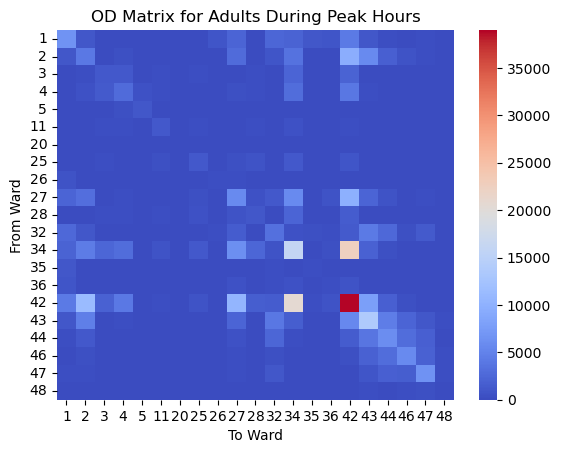

In [54]:
sn.heatmap(Adults_peak_matrix, cmap="coolwarm")
plt.title("OD Matrix for Adults During Peak Hours")
plt.xlabel("To Ward")
plt.ylabel("From Ward")
plt.show()

In [55]:
# Age group = Adults
# Time category = Non Peak
Adults_non_peak = df_chicago[(df_chicago['AGE GROUP'] == 'Adults') & 
                           (df_chicago['TIME CATEGORY'] == 'Non-Peak')]
Adults_non_peak.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD,AGE,AGE GROUP,TIME CATEGORY
379,10004,2013-06-30 10:48:00,2013-06-30 11:15:00,345.0,"1,664",34.0,Cannon Dr & Fullerton Ave,90.0,Millennium Park,Subscriber,Female,1986.0,41.926756,-87.634429,POINT (-87.634429 41.926756),41.881032,-87.624084,POINT (-87.624084 41.881032),POINT (-87.634429 41.926756),POINT (-87.624084 41.881032),43,42,39.0,Adults,Non-Peak
737,1000873,2013-11-19 20:00:00,2013-11-19 20:07:00,796.0,462,194.0,State St & Wacker Dr,56.0,Desplaines St & Kinzie St,Subscriber,Male,1974.0,41.886875,-87.626030,POINT (-87.62603 41.886875),41.888716,-87.644448,POINT (-87.644448 41.888716),POINT (-87.62603 41.886875),POINT (-87.644448 41.888716),42,34,51.0,Adults,Non-Peak
738,1000874,2013-11-19 20:00:00,2013-11-19 20:02:00,280.0,128,206.0,Halsted St & Archer Ave,207.0,Emerald Ave & 28th St,Subscriber,Male,1970.0,41.847203,-87.646795,POINT (-87.646795 41.847203),41.843580,-87.645368,POINT (-87.645368 41.84358),POINT (-87.646795 41.847203),POINT (-87.645368 41.84358),11,11,55.0,Adults,Non-Peak
739,1000876,2013-11-19 20:00:00,2013-11-19 20:05:00,2753.0,288,233.0,Sangamon St & Washington Blvd,77.0,Clinton St & Madison St,Subscriber,Male,1985.0,41.883004,-87.651148,POINT (-87.651148 41.883004),41.882242,-87.641066,POINT (-87.641066 41.882242),POINT (-87.651148 41.883004),POINT (-87.641066 41.882242),34,42,40.0,Adults,Non-Peak
740,1000877,2013-11-19 20:01:00,2013-11-19 20:03:00,1083.0,98,264.0,Stetson Ave & South Water St,52.0,Michigan Ave & Lake St,Subscriber,Male,1974.0,41.886835,-87.622320,POINT (-87.62232 41.886835),41.886024,-87.624117,POINT (-87.624117 41.886024),POINT (-87.62232 41.886835),POINT (-87.624117 41.886024),42,42,51.0,Adults,Non-Peak


In [56]:
Adults_non_peak_matrix = (
    Adults_non_peak.assign(count=1)
    .pivot_table(index="FROM WARD", columns="TO WARD",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype('int')
).sort_values("FROM WARD")

Adults_non_peak_matrix

TO WARD,1,2,3,4,5,11,20,25,26,27,28,32,34,35,36,42,43,44,46,47,48
FROM WARD,,,,,,,,,,,,,,,,,,,,,
1,9562,1166,12,86,2,13,0,105,991,2402,70,3000,1176,992,1614,2203,1529,409,73,276,2
2,1371,5428,192,525,5,18,2,46,45,3111,155,1155,3113,45,141,9390,6837,1830,612,223,12
3,20,161,1555,1435,167,491,3,210,0,105,216,3,1437,0,2,1275,23,7,8,2,0
4,95,566,1629,3175,696,269,16,147,3,307,445,26,2682,0,14,4388,314,24,17,1,0
5,0,7,132,634,822,0,2,1,0,0,0,0,4,0,0,53,0,0,0,0,0
11,14,21,483,274,3,1271,1,388,0,83,217,0,337,0,1,159,13,0,1,1,0
20,1,0,5,23,9,0,0,2,0,2,1,0,3,0,0,3,0,0,0,0,0
25,245,33,264,155,0,366,2,2265,8,501,874,21,1108,2,60,625,24,4,2,1,0
26,800,64,0,2,0,0,0,12,221,262,5,216,58,124,132,61,54,12,2,16,0


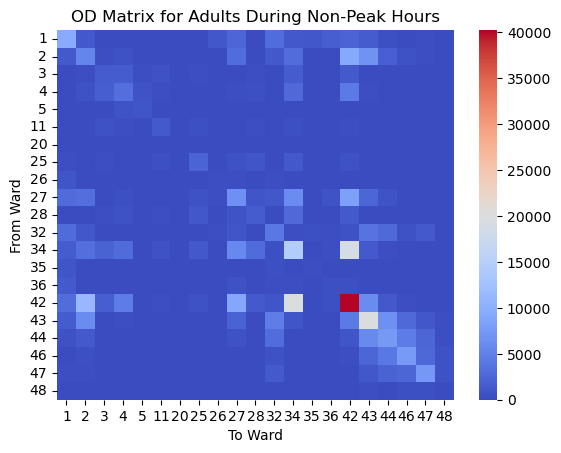

In [57]:

sn.heatmap(Adults_non_peak_matrix, cmap="coolwarm")
plt.title("OD Matrix for Adults During Non-Peak Hours")
plt.xlabel("To Ward")
plt.ylabel("From Ward")
plt.show()

In [58]:
# Age group = Seniors
# Time category = Peak
Seniors_peak = df_chicago[(df_chicago['AGE GROUP'] == 'Seniors') & 
                           (df_chicago['TIME CATEGORY'] == 'Peak')]
Seniors_peak.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD,AGE,AGE GROUP,TIME CATEGORY
17,1000006,2013-11-19 17:39:00,2013-11-19 17:45:00,1385.0,366,199.0,Wabash Ave & Grand Ave,264.0,Stetson Ave & South Water St,Subscriber,Male,1954.0,41.891738,-87.626937,POINT (-87.626937 41.891738),41.886835,-87.622320,POINT (-87.62232 41.886835),POINT (-87.626937 41.891738),POINT (-87.62232 41.886835),42,42,71.0,Seniors,Peak
23,1000011,2013-11-19 17:40:00,2013-11-19 17:53:00,126.0,825,72.0,State St & 16th St,192.0,Canal St & Adams St,Subscriber,Male,1957.0,41.860384,-87.625813,POINT (-87.625813 41.860384),41.879255,-87.639904,POINT (-87.639904 41.879255),POINT (-87.625813 41.860384),POINT (-87.639904 41.879255),3,34,68.0,Seniors,Peak
30,1000018,2013-11-19 17:40:00,2013-11-19 17:45:00,1340.0,247,287.0,Franklin St & Arcade Pl,100.0,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1962.0,41.880317,-87.635185,POINT (-87.635185 41.880317),41.888243,-87.636390,POINT (-87.63639 41.888243),POINT (-87.635185 41.880317),POINT (-87.63639 41.888243),42,42,63.0,Seniors,Peak
62,1000052,2013-11-19 17:46:00,2013-11-19 17:53:00,101.0,450,49.0,Dearborn St & Monroe St,100.0,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1959.0,41.881320,-87.629521,POINT (-87.629521 41.88132),41.888243,-87.636390,POINT (-87.63639 41.888243),POINT (-87.629521 41.88132),POINT (-87.63639 41.888243),34,42,66.0,Seniors,Peak
74,1000067,2013-11-19 17:43:00,2013-11-19 17:52:00,848.0,570,81.0,Daley Center Plaza,192.0,Canal St & Adams St,Subscriber,Male,1960.0,41.884451,-87.629892,POINT (-87.629892 41.884451),41.879255,-87.639904,POINT (-87.639904 41.879255),POINT (-87.629892 41.884451),POINT (-87.639904 41.879255),42,34,65.0,Seniors,Peak


In [59]:
Seniors_peak_matrix = (
    Seniors_peak.assign(count=1)
    .pivot_table(index="FROM WARD", columns="TO WARD",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype('int')
).sort_values("FROM WARD")

Seniors_peak_matrix

TO WARD,1,2,3,4,5,11,20,25,26,27,28,32,34,35,36,42,43,44,46,47,48
FROM WARD,,,,,,,,,,,,,,,,,,,,,
1,286,73,1,3,0,0,0,2,42,161,2,198,68,13,76,123,67,8,0,4,0
2,41,661,22,85,0,0,0,1,0,234,7,173,482,0,4,1789,557,117,56,14,1
3,1,18,114,253,6,74,0,13,0,4,18,0,259,0,0,221,2,0,0,0,0
4,7,84,243,535,41,23,5,14,0,88,83,2,1000,0,0,869,12,2,3,1,0
5,0,0,8,49,292,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
11,0,1,45,23,0,140,0,26,0,64,17,0,53,0,0,33,0,0,0,0,0
20,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,1,1,9,34,0,20,0,100,1,10,40,0,21,0,3,33,0,0,0,0,0
26,36,0,0,0,0,0,0,0,3,3,0,63,0,2,0,0,0,0,0,0,0


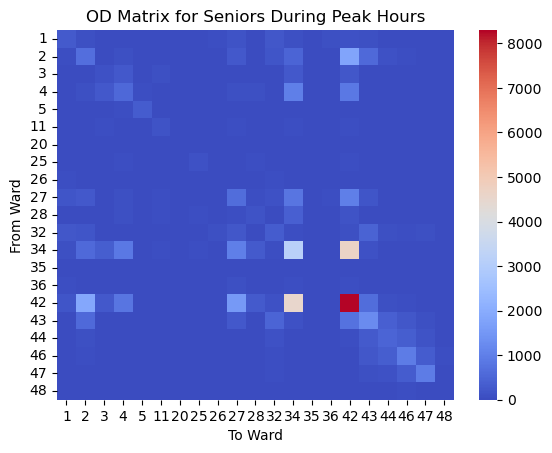

In [60]:

sn.heatmap(Seniors_peak_matrix, cmap="coolwarm")
plt.title("OD Matrix for Seniors During Peak Hours")
plt.xlabel("To Ward")
plt.ylabel("From Ward")
plt.show()

In [61]:
# Age group = Seniors
# Time category = Non Peak
Seniors_non_peak = df_chicago[(df_chicago['AGE GROUP'] == 'Seniors') & 
                           (df_chicago['TIME CATEGORY'] == 'Non-Peak')]
Seniors_non_peak.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD,AGE,AGE GROUP,TIME CATEGORY
743,1000884,2013-11-19 20:02:00,2013-11-19 20:11:00,1467.0,546,137.0,Morgan Ave & 14th Pl,109.0,900 W Harrison,Subscriber,Male,1954.0,41.862378,-87.651062,POINT (-87.651062 41.862378),41.874675,-87.650019,POINT (-87.650019 41.874675),POINT (-87.651062 41.862378),POINT (-87.650019 41.874675),28,34,71.0,Seniors,Non-Peak
745,1000886,2013-11-19 20:03:00,2013-11-19 20:12:00,1663.0,543,137.0,Morgan Ave & 14th Pl,109.0,900 W Harrison,Subscriber,Female,1956.0,41.862378,-87.651062,POINT (-87.651062 41.862378),41.874675,-87.650019,POINT (-87.650019 41.874675),POINT (-87.651062 41.862378),POINT (-87.650019 41.874675),28,34,69.0,Seniors,Non-Peak
780,1000939,2013-11-19 20:15:00,2013-11-19 20:23:00,754.0,430,33.0,State St & Van Buren St,174.0,Canal St & Madison St,Subscriber,Male,1940.0,41.877181,-87.627844,POINT (-87.627844 41.877181),41.882091,-87.639833,POINT (-87.639833 41.882091),POINT (-87.627844 41.877181),POINT (-87.639833 41.882091),4,42,85.0,Seniors,Non-Peak
785,1000947,2013-11-19 20:17:00,2013-11-19 20:21:00,1344.0,267,45.0,Michigan Ave & Congress Pkwy,255.0,Indiana Ave & Roosevelt Rd,Subscriber,Male,1962.0,41.876243,-87.624426,POINT (-87.624426 41.876243),41.867888,-87.623041,POINT (-87.623041 41.867888),POINT (-87.624426 41.876243),POINT (-87.623041 41.867888),4,4,63.0,Seniors,Non-Peak
795,1000963,2013-11-19 20:21:00,2013-11-19 20:27:00,2553.0,355,90.0,Millennium Park,174.0,Canal St & Madison St,Subscriber,Male,1962.0,41.881032,-87.624084,POINT (-87.624084 41.881032),41.882091,-87.639833,POINT (-87.639833 41.882091),POINT (-87.624084 41.881032),POINT (-87.639833 41.882091),42,42,63.0,Seniors,Non-Peak


In [62]:
Seniors_non_peak_matrix = (
    Seniors_non_peak.assign(count=1)
    .pivot_table(index="FROM WARD", columns="TO WARD",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype('int')
).sort_values("FROM WARD")

Seniors_non_peak_matrix

TO WARD,1,2,3,4,5,11,20,25,26,27,28,32,34,35,36,42,43,44,46,47,48
FROM WARD,,,,,,,,,,,,,,,,,,,,,
1,388,54,4,9,0,0,0,3,34,180,6,198,61,27,55,148,80,6,2,4,1
2,75,873,27,115,1,3,0,0,1,415,13,88,654,0,2,2205,1019,192,62,18,7
3,0,20,163,246,25,106,1,11,0,11,22,0,244,0,0,266,4,0,0,0,0
4,11,149,250,805,72,32,2,47,0,106,73,2,1032,0,0,1149,25,1,1,2,0
5,0,0,21,63,132,0,0,0,0,0,0,0,1,0,0,6,0,0,0,0,0
11,0,3,114,49,0,256,0,21,0,7,29,0,48,0,0,25,0,0,0,0,0
20,0,0,2,2,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0
25,1,0,27,13,0,28,0,185,0,18,79,0,52,0,3,12,1,0,0,0,0
26,33,2,0,0,0,0,0,0,15,1,0,21,1,0,2,1,0,0,0,0,0


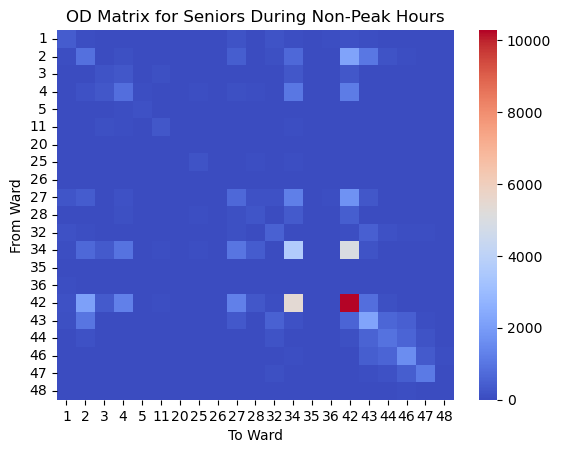

In [63]:

sn.heatmap(Seniors_non_peak_matrix, cmap="coolwarm")
plt.title("OD Matrix for Seniors During Non-Peak Hours")
plt.xlabel("To Ward")
plt.ylabel("From Ward")
plt.show()

In [64]:
# exercise 3 prepare the csv focus on date: 05-2014

In [72]:
csv_file = r'C:\Users\jiang\Desktop\1 Big data\Divvy_Trips.csv'
df_csv = pd.read_csv(csv_file, on_bad_lines='warn', sep=';')
df_csv.head()

C:\Users\jiang\AppData\Local\Temp\ipykernel_13612\2761995533.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(csv_file, on_bad_lines='warn', sep=';')


,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,8546790,12/31/2015 05:35:00 PM,12/31/2015 05:44:00 PM,979.0,521,117.0,Wilton Ave & Belmont Ave,229.0,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739)
1,8546793,12/31/2015 05:37:00 PM,12/31/2015 05:41:00 PM,1932.0,256,301.0,Clark St & Schiller St,138.0,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613)
2,8546795,12/31/2015 05:37:00 PM,12/31/2015 05:40:00 PM,1693.0,134,465.0,Marine Dr & Ainslie St,251.0,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968)
3,8546797,12/31/2015 05:38:00 PM,12/31/2015 05:55:00 PM,3370.0,995,333.0,Ashland Ave & Blackhawk St,198.0,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892)
4,8546798,12/31/2015 05:38:00 PM,12/31/2015 05:41:00 PM,2563.0,177,48.0,Larrabee St & Kingsbury St,111.0,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666)


In [74]:
df_csv['START TIME'] = pd.to_datetime(df_csv['START TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df_csv['STOP TIME'] = pd.to_datetime(df_csv['STOP TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [76]:
filtered_data = df_csv[
    (df_csv['START TIME'].dt.year == 2014) & (df_csv['START TIME'].dt.month == 5) &
    (df_csv['STOP TIME'].dt.year == 2014) & (df_csv['STOP TIME'].dt.month == 5)
]

In [78]:
output_file = "filtered_data_2014_05.csv"  
filtered_data.to_csv(output_file, index=False)

In [80]:
# exercise 4

In [82]:
# the average parking duration of vehicles in different wards?

In [84]:
!pip install folium shapely

In [86]:
df_chicago.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD,AGE,AGE GROUP,TIME CATEGORY
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117.0,Wilton Ave & Belmont Ave,229.0,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),POINT (-87.65304 41.94018),POINT (-87.66402 41.943739),44,44,34.0,Adults,Peak
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301.0,Clark St & Schiller St,138.0,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),POINT (-87.631501 41.907993),POINT (-87.640552 41.904613),2,27,33.0,Adults,Peak
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465.0,Marine Dr & Ainslie St,251.0,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),POINT (-87.650154 41.9716),POINT (-87.650001 41.967968),48,46,38.0,Adults,Peak
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333.0,Ashland Ave & Blackhawk St,198.0,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),POINT (-87.667252 41.907066),POINT (-87.648789 41.881892),1,27,50.0,Adults,Peak
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48.0,Larrabee St & Kingsbury St,111.0,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),POINT (-87.642884 41.897764),POINT (-87.638437 41.894666),27,42,35.0,Adults,Peak


In [120]:
# Do an overlapping visualisation with OD matrices and average parking durations across the different parts of the city 
# for different hours of the day
# sort data into 3 group: AM Peak(START TIME 7-10) PM Peak(START TIME 16-19) Midday Off-Peak(START TIME 10-16)

In [110]:
df_chicago['START TIME'] = pd.to_datetime(df_chicago['START TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
filtered_ampeak_data = df_chicago[
    (df_chicago['START TIME'].dt.hour < 10) & (df_chicago['START TIME'].dt.hour >= 7) ]
output_file = "filtered_ampeak_data.csv"  
filtered_ampeak_data.to_csv(output_file, index=False)

In [118]:
# PM Peak(START TIME 16-19)

In [112]:
df_chicago['START TIME'] = pd.to_datetime(df_chicago['START TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
filtered_pmpeak_data = df_chicago[
    (df_chicago['START TIME'].dt.hour < 19) & (df_chicago['START TIME'].dt.hour >= 16) ]
output_file = "filtered_pmpeak_data.csv"  
filtered_pmpeak_data.to_csv(output_file, index=False)

In [116]:
# Midday Peak(START TIME 10-16)

In [114]:
df_chicago['START TIME'] = pd.to_datetime(df_chicago['START TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
filtered_midpeak_data = df_chicago[
    (df_chicago['START TIME'].dt.hour < 16) & (df_chicago['START TIME'].dt.hour >= 10) ]
output_file = "filtered_midpeak_data.csv"  
filtered_midpeak_data.to_csv(output_file, index=False)

In [122]:
# count trips

In [124]:
od_counts = filtered_ampeak_data.groupby(['FROM WARD', 'TO WARD']).size().reset_index(name='trip_count')
# delete counted trips less than 10
od_counts = od_counts[od_counts['trip_count'] > 10] 
od_counts.to_csv('am_peak_od_counts.csv', index=False)

In [126]:
od_counts = filtered_pmpeak_data.groupby(['FROM WARD', 'TO WARD']).size().reset_index(name='trip_count')
# delete counted trips less than 10
od_counts = od_counts[od_counts['trip_count'] > 10] 
od_counts.to_csv('pm_peak_od_counts.csv', index=False)

In [128]:
od_counts = filtered_midpeak_data.groupby(['FROM WARD', 'TO WARD']).size().reset_index(name='trip_count')
# delete counted trips less than 10
od_counts = od_counts[od_counts['trip_count'] > 10] 
od_counts.to_csv('mid_peak_od_counts.csv', index=False)

In [ ]:
# parking duration

In [88]:
# Sort data by Device ID and Start Time
df_chicago = df_chicago.sort_values(by=['BIKE ID', 'START TIME'])
df_chicago.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD,AGE,AGE GROUP,TIME CATEGORY
69667,11009,2013-06-30 14:57:00,2013-06-30 15:25:00,1.0,"1,682",88.0,May St & Randolph St,27.0,Larrabee St & North Ave,Subscriber,Male,1991.0,41.883970,-87.655688,POINT (-87.655688 41.88397),41.910210,-87.643500,POINT (-87.6435 41.91021),POINT (-87.655688 41.88397),POINT (-87.6435 41.91021),27,27,34.0,Adults,Non-Peak
491283,16666,2013-07-02 09:37:00,2013-07-02 10:00:00,1.0,"1,380",94.0,Lincoln Ave & Armitage Ave,52.0,Michigan Ave & Lake St,Subscriber,Female,1959.0,41.918306,-87.636282,POINT (-87.636282 41.918306),41.886024,-87.624117,POINT (-87.624117 41.886024),POINT (-87.636282 41.918306),POINT (-87.624117 41.886024),43,42,66.0,Seniors,Peak
738696,19616,2013-07-03 08:37:00,2013-07-03 08:49:00,1.0,753,80.0,Aberdeen St & Madison St,51.0,Clark St & Randolph St,Subscriber,Male,1975.0,41.880456,-87.653929,POINT (-87.653929 41.880456),41.884576,-87.631890,POINT (-87.63189 41.884576),POINT (-87.653929 41.880456),POINT (-87.63189 41.884576),34,42,50.0,Adults,Peak
759959,19871,2013-07-03 10:32:00,2013-07-03 10:37:00,1.0,327,51.0,Clark St & Randolph St,52.0,Michigan Ave & Lake St,Subscriber,Female,1980.0,41.884576,-87.631890,POINT (-87.63189 41.884576),41.886024,-87.624117,POINT (-87.624117 41.886024),POINT (-87.63189 41.884576),POINT (-87.624117 41.886024),42,42,45.0,Adults,Non-Peak
841797,20842,2013-07-03 14:36:00,2013-07-03 14:51:00,1.0,915,25.0,Michigan Ave & Pearson St,54.0,Ogden Ave & Chicago Ave,Subscriber,Female,1962.0,41.897660,-87.623510,POINT (-87.62351 41.89766),41.896362,-87.654061,POINT (-87.654061 41.896362),POINT (-87.62351 41.89766),POINT (-87.654061 41.896362),2,27,63.0,Seniors,Non-Peak


In [90]:
# Calculate Parking Duration (Time Between Trips)
df_chicago['Parking Duration'] = (
    df_chicago.groupby('BIKE ID')['START TIME']
    .shift(-1) - df_chicago['STOP TIME']
)
df_chicago.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD,AGE,AGE GROUP,TIME CATEGORY,Parking Duration
69667,11009,2013-06-30 14:57:00,2013-06-30 15:25:00,1.0,"1,682",88.0,May St & Randolph St,27.0,Larrabee St & North Ave,Subscriber,Male,1991.0,41.883970,-87.655688,POINT (-87.655688 41.88397),41.910210,-87.643500,POINT (-87.6435 41.91021),POINT (-87.655688 41.88397),POINT (-87.6435 41.91021),27,27,34.0,Adults,Non-Peak,1 days 18:12:00
491283,16666,2013-07-02 09:37:00,2013-07-02 10:00:00,1.0,"1,380",94.0,Lincoln Ave & Armitage Ave,52.0,Michigan Ave & Lake St,Subscriber,Female,1959.0,41.918306,-87.636282,POINT (-87.636282 41.918306),41.886024,-87.624117,POINT (-87.624117 41.886024),POINT (-87.636282 41.918306),POINT (-87.624117 41.886024),43,42,66.0,Seniors,Peak,0 days 22:37:00
738696,19616,2013-07-03 08:37:00,2013-07-03 08:49:00,1.0,753,80.0,Aberdeen St & Madison St,51.0,Clark St & Randolph St,Subscriber,Male,1975.0,41.880456,-87.653929,POINT (-87.653929 41.880456),41.884576,-87.631890,POINT (-87.63189 41.884576),POINT (-87.653929 41.880456),POINT (-87.63189 41.884576),34,42,50.0,Adults,Peak,0 days 01:43:00
759959,19871,2013-07-03 10:32:00,2013-07-03 10:37:00,1.0,327,51.0,Clark St & Randolph St,52.0,Michigan Ave & Lake St,Subscriber,Female,1980.0,41.884576,-87.631890,POINT (-87.63189 41.884576),41.886024,-87.624117,POINT (-87.624117 41.886024),POINT (-87.63189 41.884576),POINT (-87.624117 41.886024),42,42,45.0,Adults,Non-Peak,0 days 03:59:00
841797,20842,2013-07-03 14:36:00,2013-07-03 14:51:00,1.0,915,25.0,Michigan Ave & Pearson St,54.0,Ogden Ave & Chicago Ave,Subscriber,Female,1962.0,41.897660,-87.623510,POINT (-87.62351 41.89766),41.896362,-87.654061,POINT (-87.654061 41.896362),POINT (-87.62351 41.89766),POINT (-87.654061 41.896362),2,27,63.0,Seniors,Non-Peak,2 days 00:58:00


In [92]:
# Calculate Average Parking Duration by Wards
df_chicago['Parking Duration'] = df_chicago['Parking Duration'].dt.total_seconds() / 60  # Convert to minutes
df_chicago.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_point,to_point,FROM WARD,TO WARD,AGE,AGE GROUP,TIME CATEGORY,Parking Duration
69667,11009,2013-06-30 14:57:00,2013-06-30 15:25:00,1.0,"1,682",88.0,May St & Randolph St,27.0,Larrabee St & North Ave,Subscriber,Male,1991.0,41.883970,-87.655688,POINT (-87.655688 41.88397),41.910210,-87.643500,POINT (-87.6435 41.91021),POINT (-87.655688 41.88397),POINT (-87.6435 41.91021),27,27,34.0,Adults,Non-Peak,2532.0
491283,16666,2013-07-02 09:37:00,2013-07-02 10:00:00,1.0,"1,380",94.0,Lincoln Ave & Armitage Ave,52.0,Michigan Ave & Lake St,Subscriber,Female,1959.0,41.918306,-87.636282,POINT (-87.636282 41.918306),41.886024,-87.624117,POINT (-87.624117 41.886024),POINT (-87.636282 41.918306),POINT (-87.624117 41.886024),43,42,66.0,Seniors,Peak,1357.0
738696,19616,2013-07-03 08:37:00,2013-07-03 08:49:00,1.0,753,80.0,Aberdeen St & Madison St,51.0,Clark St & Randolph St,Subscriber,Male,1975.0,41.880456,-87.653929,POINT (-87.653929 41.880456),41.884576,-87.631890,POINT (-87.63189 41.884576),POINT (-87.653929 41.880456),POINT (-87.63189 41.884576),34,42,50.0,Adults,Peak,103.0
759959,19871,2013-07-03 10:32:00,2013-07-03 10:37:00,1.0,327,51.0,Clark St & Randolph St,52.0,Michigan Ave & Lake St,Subscriber,Female,1980.0,41.884576,-87.631890,POINT (-87.63189 41.884576),41.886024,-87.624117,POINT (-87.624117 41.886024),POINT (-87.63189 41.884576),POINT (-87.624117 41.886024),42,42,45.0,Adults,Non-Peak,239.0
841797,20842,2013-07-03 14:36:00,2013-07-03 14:51:00,1.0,915,25.0,Michigan Ave & Pearson St,54.0,Ogden Ave & Chicago Ave,Subscriber,Female,1962.0,41.897660,-87.623510,POINT (-87.62351 41.89766),41.896362,-87.654061,POINT (-87.654061 41.896362),POINT (-87.62351 41.89766),POINT (-87.654061 41.896362),2,27,63.0,Seniors,Non-Peak,2938.0


In [94]:
average_parking_duration = (
    df_chicago.groupby('FROM WARD')['Parking Duration']
    .mean()
    .reset_index()
    .rename(columns={'Parking Duration': 'Average Parking Duration (mins)'})
)
average_parking_duration['Average Parking Duration (mins)'] = average_parking_duration['Average Parking Duration (mins)'].astype('int')
average_parking_duration.head(21)

,FROM WARD,Average Parking Duration (mins)
0,1,1501
1,2,1152
2,3,1712
3,4,1545
4,5,2622
5,11,2451
6,20,7688
7,25,2115
8,26,1334
9,27,1315


In [96]:
#  visualisation with OD matrices 
import pandas as pd
import numpy as np

In [98]:
# Group by FROM WARD and TO WARD, then sum the parking duration
od_parking_duration = (
    df_chicago
    .groupby(['FROM WARD', 'TO WARD'])['Parking Duration']
    .sum()
    .reset_index()
    .rename(columns={'Parking Duration': 'Total Parking Duration (mins)'})
)

# Display the results
od_parking_duration.head(1000) 

,FROM WARD,TO WARD,Total Parking Duration (mins)
0,1,1,30458048.0
1,1,2,3143831.0
2,1,3,154153.0
3,1,4,378026.0
4,1,5,34383.0
...,...,...,...
378,48,43,181746.0
379,48,44,115699.0
380,48,46,706613.0
381,48,47,1226742.0


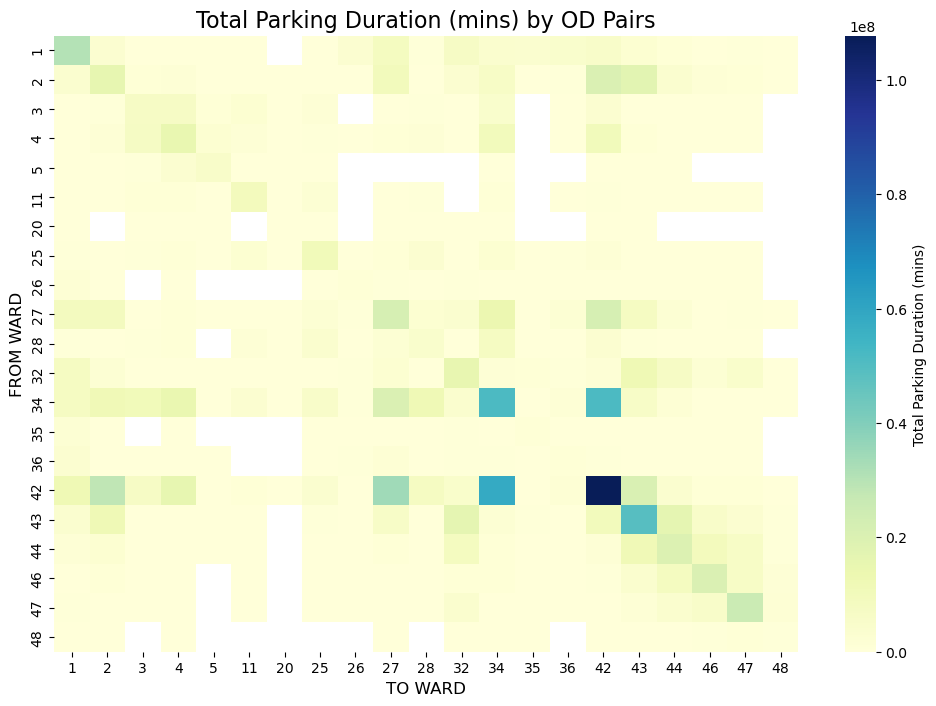

In [100]:
# Pivot the data to create a matrix format for heatmap
od_matrix = od_parking_duration.pivot(index='FROM WARD', columns='TO WARD', values='Total Parking Duration (mins)')

# Create the heatmap
plt.figure(figsize=(12, 8))
sn.heatmap(od_matrix, cmap="YlGnBu", annot=False, fmt=".0f", cbar_kws={'label': 'Total Parking Duration (mins)'})
plt.title('Total Parking Duration (mins) by OD Pairs', fontsize=16)
plt.xlabel('TO WARD', fontsize=12)
plt.ylabel('FROM WARD', fontsize=12)
plt.show()